# Environmental Analytics Lab 4
## Semester 2, 2022-23
## Dr. Bianca Schoen-Phelan
Based on Geopandas documentation and others, see lecture notes.

**Task**: 

Run the cells that contain examples (either by using the play button or by typeing `shift+Enter`). Do the exercises that are marked with "**Task**".

## GeoPy

[Geopy](https://geopy.readthedocs.io/en/stable/) is an easy to use interface for many spatial analytics tasks.

Geopy let's you geocode with Nominatim. We have used Nominatim already last week. We will do a quick revision as part of getting to know geopy.

 
 

In [104]:
# this is likely already installed
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Nominatim Revision and Distance Calculation

In order to calculate distances we require our coordinates to be in the formate of Python **tuples**.

GeoPy supports different types of distance calculations. We will focus on the most used one, the geodesic calculation. geopy also supports a great circle distance calculation.

The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth.

Your distance calculation using this will be most accurate if your CRS uses one of the ellipsoidal models that geopy can use:

```
              model             major (km)   minor (km)     flattening
ELLIPSOIDS = {'WGS-84':        (6378.137,    6356.7523142,  1 / 298.257223563),
              'GRS-80':        (6378.137,    6356.7523141,  1 / 298.257222101),
              'Airy (1830)':   (6377.563396, 6356.256909,   1 / 299.3249646),
              'Intl 1924':     (6378.388,    6356.911946,   1 / 297.0),
              'Clarke (1880)': (6378.249145, 6356.51486955, 1 / 293.465),
              'GRS-67':        (6378.1600,   6356.774719,   1 / 298.25),
              }
```





In [105]:
# imports
from geopy.distance import geodesic
from geopy.exc import GeocoderTimedOut


Let's look at a simple example first, before getting more realistic:

In [106]:
origin = (30.172705, 31.526725) 
destination = (30.288281, 31.732326)

# geodesic distance is on a sphere
# this is important when you choose your coordinate system
print(geodesic(origin, destination).meters)  # 23576.805481751613
print(geodesic(origin, destination).kilometers)  # 23.576805481751613
print(geodesic(origin, destination).miles)  # 14.6499477313437

23576.805481751613
23.576805481751613
14.64994773134371


In [107]:
# define the coordinates of Cork and Dublin in 4326
cork_coords = (51.8969, -8.4863)
dublin_coords = (53.3498, -6.2603)

# calculate the geodesic distance between Cork and Dublin

distance = geodesic(cork_coords, dublin_coords).km
print(f"The geodesic distance between Cork and Dublin is {distance:.2f} km.")


The geodesic distance between Cork and Dublin is 221.03 km.


Let's do this with different locations and this time using the geocoder.

In [108]:
# imports
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from geopy.exc import GeocoderTimedOut


In [109]:
# define the address of Cahill's Cross in Monastervin
cch_address = "Cahill's Cross, Monasterevin, County Kildare, Ireland"

# initialise a geocoder object and geocode the address of Cahill's Cross
# NOTE: the Nominatim geocoder allows only 1 request per second per user
# *******TO DO: change to a unique user name of your choice*****
geolocator = Nominatim(user_agent="bsp_EA_class")


try:
    cch_location = geolocator.geocode(cch_address, timeout=10)
    cch_coords = (cch_location.latitude, cch_location.longitude)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s" % (cch_address, e.message))

# define the name of county Limerick
county_limerick = "County Limerick, Ireland"

# geocode the name of county Limerick to get its centroid coordinates
try:
    lmk_location = geolocator.geocode(county_limerick, exactly_one=False, limit=1, timeout=10)[0]
    lmk_coords = (lmk_location.latitude, lmk_location.longitude)

    # check out of interest:
    print("Type of lmk_location: ", type(lmk_location))
    print("Type of lmk_coords: ", type(lmk_coords))
    print("Coords: ", lmk_coords)
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s" % (county_limerick, e.message))

# calculate the geodesic distance between Cahill's Cross and the centroid of county Limerick
try:
    distance = geodesic(cch_coords, lmk_coords).km
    print(f"The geodesic distance between Cahill's Cross and the centroid of county Limerick is {distance:.2f} km.")
except NameError:
    print("Error: unable to calculate distance due to geocoding errors.")


Type of lmk_location:  <class 'geopy.location.Location'>
Type of lmk_coords:  <class 'tuple'>
Coords:  (52.4882688, -8.854585286098791)
The geodesic distance between Cahill's Cross and the centroid of county Limerick is 141.32 km.


These data types do not hold CRS information. However, we know from the documentation that OSM Nominatim uses 4326.

In [110]:
# Import necessary modules
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [111]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import geopandas as gpd

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Example of Distance Calculation Using Files
Load one of your Ireland shapefile(s) from last week as well as your *geocoded* addresses file. Calculate the distance between a **place** of your choice from the address shp file, and a **county** of your choice from the counties shp file, using the distance calculation above.

Remember that this is a point-to-point calcultation. If you have a geometry that is not a point, such as a line or a polygon, you need to calculate a point for it first. Typically, we use the **centroid** for this. See last week's lab as well for centroid calculations.

REMEMBER: Centroid calculations are only permitted on cartesian CRS!!!

In [114]:
counties_fp = '/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/counties_3035.shp'
addresses_fp = '/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/addresses.shp'

counties_shp = gpd.read_file(counties_fp)
addresses_shp = gpd.read_file(addresses_fp)



The first step with any geo investigation that involves multiple files is to check their CRS and 


1.   Make sure that they match; and
2.   Make sure that they are in a CRS that supports the operations that you want to run on them.



In [115]:
# check for CRS, we want 3035 for our calculations
# alternatively, you can use a purely Irish CRS
counties_shp.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [116]:
addresses_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [117]:
counties_shp.columns

Index(['OBJECTID', 'CO_ID', 'ENGLISH', 'GAEILGE', 'LOGAINM_ID', 'GUID',
       'CONTAE', 'COUNTY', 'PROVINCE', 'CENTROID_X', 'CENTROID_Y', 'AREA',
       'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

In [118]:
counties_shp.shape

(26, 15)

In [119]:
# let's have a look into the counties shape file(s).
counties_shp.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((3182036.521 3705585.448, 31820..."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((3086579.463 3451053.366, 3086584.098..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((3233497.803 3485073.587, 3233505.206..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((3128791.890 3365858.810, 31287..."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((3237295.918 3488563.063, 32372..."


In [120]:
# a little reminder
type(counties_shp)

geopandas.geodataframe.GeoDataFrame

In [121]:
# very useful information as this is sometimes surprising
counties_shp.dtypes

OBJECTID         int64
CO_ID           object
ENGLISH         object
GAEILGE         object
LOGAINM_ID      object
GUID            object
CONTAE          object
COUNTY          object
PROVINCE        object
CENTROID_X     float64
CENTROID_Y     float64
AREA           float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [122]:
# it is good practice to name your data frame by the name of the 
# CRS that the information is stored in. That helps a lot with
# furhter processng
counties_3035 = counties_shp.copy()

In [123]:
# have a quick look inside and make sure everything is as expected
counties_3035.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((3182036.521 3705585.448, 31820..."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((3086579.463 3451053.366, 3086584.098..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((3233497.803 3485073.587, 3233505.206..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((3128791.890 3365858.810, 31287..."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((3237295.918 3488563.063, 32372..."


We will now calculate the centroid as we have the address file in a cartesian CRS.

In [124]:
# for distance calculations a centre of mass is needed
# centroids only work on projected CRS

counties_3035['centroid'] = counties_3035.centroid
counties_3035.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry,centroid
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((3182036.521 3705585.448, 31820...",POINT (3186046.822 3677148.956)
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((3086579.463 3451053.366, 3086584.098...",POINT (3063865.302 3428606.602)
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((3233497.803 3485073.587, 3233505.206...",POINT (3208375.733 3472256.880)
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((3128791.890 3365858.810, 31287...",POINT (3130654.504 3374220.263)
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((3237295.918 3488563.063, 32372...",POINT (3248062.191 3486120.722)


Now comes the tricky part:



1.   We needed a cartesian CRS for centroid calculation.
2.   Distance is a geodetic calculation needing a geographic CRS.
3.   `.to_crs` changes the geometry column only, not any other columns, even if they contain spatial information.
4.    We need a CRS where the geographic approximation is one of the ones that `distance` supports, preferrable the default (see above).

Let's look at how to solve this.

We have two options how to solve problem (3). We can either
1.   get rid of the columns that we do not need, or
2.   go at it in a 2-step process, first applying `.to_crs` to the DataFrame and then to the DataSeries for the centroid information.

The following code illustrates both options.



In [125]:
# Option 1: We get rid of columns that we don't need and declare our
# centroid column as THE geometry column

# create a smaller set
counties_smll_3035 = counties_3035[['COUNTY','centroid']].copy()

# check it worked
counties_smll_3035.head()

,COUNTY,centroid
0,DONEGAL,POINT (3186046.822 3677148.956)
1,LIMERICK,POINT (3063865.302 3428606.602)
2,KILDARE,POINT (3208375.733 3472256.880)
3,WATERFORD,POINT (3130654.504 3374220.263)
4,DUBLIN,POINT (3248062.191 3486120.722)


In [126]:
# our counties_smll_3035 does have a column with geometry information
# in it, but you need to tell GeoPandas that this is the active
# geometry.
counties_smll_3035 = counties_smll_3035.set_geometry('centroid')

In [127]:
counties_smll_3035.head()

,COUNTY,centroid
0,DONEGAL,POINT (3186046.822 3677148.956)
1,LIMERICK,POINT (3063865.302 3428606.602)
2,KILDARE,POINT (3208375.733 3472256.880)
3,WATERFORD,POINT (3130654.504 3374220.263)
4,DUBLIN,POINT (3248062.191 3486120.722)


In [128]:
# then do the conversion
counties_smll_4326 = counties_smll_3035.to_crs(epsg=4326)

# and check
counties_smll_4326.head()

,COUNTY,centroid
0,DONEGAL,POINT (-7.90796 54.92219)
1,LIMERICK,POINT (-8.74976 52.49602)
2,KILDARE,POINT (-6.81870 53.19024)
3,WATERFORD,POINT (-7.59747 52.17358)
4,DUBLIN,POINT (-6.28458 53.39189)


Observe the difference in the CRS value ranges.

The other option is to do a 2-step transformation on the original. 

1.   We change and copy as before, then
2.   We change the CRS on just the centroid column.



In [129]:
# Option 2: do the conversion twice, once on the DataFrame and then on the 
# DataSeries that holds the centroid information

# Step 1: only the geometry column
# we choose 4326 because this is the default for the distance calculation
counties_4326 = counties_3035.to_crs(epsg=4326)  

# and check that it worked
counties_4326.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry,centroid
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55...",POINT (3186046.822 3677148.956)
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((-8.50852 52.74196, -8.50851 52.74209...",POINT (3063865.302 3428606.602)
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((-6.49499 53.35338, -6.49486 53.35333...",POINT (3208375.733 3472256.880)
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((-7.59463 52.09696, -7.59459 52...",POINT (3130654.504 3374220.263)
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53...",POINT (3248062.191 3486120.722)


Look at the `centroid` column and compare it to the `geography` column. They have different number ranges, which indicates that they are not in the same CRS. As mentioned earlier, `.to_crs` only works on the `geometry` column, even if there are others that contain a geometry.

Now we do need to change this particular column:

In [130]:
# Step 2: change the DataSeries and overwrite the information in the 
# centroid column

centroids = counties_4326['centroid'].to_crs(epsg=4326)
counties_4326['centroid'] = centroids

In [131]:
# and check
counties_4326.head()

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry,centroid
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55...",POINT (-7.90796 54.92219)
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((-8.50852 52.74196, -8.50851 52.74209...",POINT (-8.74976 52.49602)
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((-6.49499 53.35338, -6.49486 53.35333...",POINT (-6.81870 53.19024)
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((-7.59463 52.09696, -7.59459 52...",POINT (-7.59747 52.17358)
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53...",POINT (-6.28458 53.39189)


Look at the value ranges, they are now plausibly simiilar! Also compare the centroid values to the one from the counties_smll.... dataset!

Create a new column that contains the centroid information for each polygon/multipolygon in our counties table. This is the standard approach if you want to check for distance between a point and a polygon. It doesn't have to be what you want though. You might like to calculate the distance between a polygon's exterior at a specific point and a certain point. See [this article (click)](https://medium.com/analytics-vidhya/calculating-distances-from-points-to-polygon-borders-in-python-a-paris-example-3b597e1ea291).

Remember that the centroid can only be calculated for a cartesian CRS, not for a geographic one.

Now, let's get back to our addresses file. Earlier, we checked its CRS and it was already in 4326, which is needed for the distance calculation. For best practice, it's helpful to rename it to a name that indicates what CRS it uses.

In [132]:
addresses_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [133]:
# good practice first! Save a copy of the shape file with a name
# that indicates its CRS, in case you want to use it later. This
# helps that you don't get confused
addresses_4326 = addresses_shp.to_crs(epsg=4326)

# and check
addresses_4326

,address,id,addr,geometry
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (-7.06112 53.13905)
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (-8.18129 53.62210)


We are ready now for the actual distance calculation using our two files, the addresses and the counties.

The geopy distance function takes its arguments as a Python **tuple**. If you need a reminder of how to use geodesic, have a look at the beginning of his notebook. You can also click on the headline 'Distance Calculation' in the left Table of Contents.

The following explains how to extract the tuple information from each file. We are going to calculate the distance from Cahill's Cross (from the address shp file) to Limerick (from the counties shp file).

One thing to note here is how POINT stores information in (longitude,latitude), not (lat,long) as expected for the distance calculation.

In [134]:
# retrieve a position for Limerick from our counties df, the geometry
# holds a polygon but for distance calculations we need a point as 
# distance calculations are point-to-point calculations, so we take 
# the centroid

limerick = counties_4326.loc[counties_4326['COUNTY']=='LIMERICK', 'centroid']

print("Limerick: ", limerick)
# notice how the return of the print shows you TWO outputs, we get
# 1 POINT(....)
# what we want is the value of POINT, and not the index position of it in 
# the result. We need to be careful going forward that we get the value of the
# point. Unfortunately, we cannot retrieve this directly. The syntax 
# to retrieve the values of POINT(...) is cumbersome, so pay it close 
# attention!!!

limerick_index = limerick.index[0]
# you may try fetching index[1]. This will return an error.

print("Limerick index: ", limerick_index)

# we can fill our lat/lon values for our tuple for geodesic
# by getting the x and y coordinates from POINT(...) in the
# following way:
x = limerick[limerick_index].x
y = limerick[limerick_index].y

# now we create the Python tuple with those values:
# limerick_tuple=(x,y)
# switch them for lat, long correction
limerick_tuple=(y,x)
print(f"Limerick as tuple: {limerick_tuple}")


# Let's retrieve a point from addresses by picking 
# from the name of it, which is a more realistic kind of query
# compared to speaking of indexes or lat/lon values
# we use the "contains" function from the str function sets 
cahill_cross = addresses_4326.loc[addresses_4326['address'].str.contains("Cahill"), 'geometry']

# we are repeating exactly the same thing we did before
# we grab that 1 and then retrieve the x and y values
# and then create a Python tuple
cc_index = cahill_cross.index[0]
x = cahill_cross[cc_index].x
y = cahill_cross[cc_index].y
cc_tuple=(y, x)

print(f"Cahill Cross as tuple: {cc_tuple}")

print("Geodesic distance in meters: ", geodesic(limerick_tuple, cc_tuple).meters)  # 182585.34337016192
print("Geodesic distance in km: ", geodesic(limerick_tuple, cc_tuple).kilometers)  # 182.58534337016192
print("Geodesic distance in miles: ",geodesic(limerick_tuple, cc_tuple).miles)  # 113.45327249498051

Limerick:  1    POINT (-8.74976 52.49602)
Name: centroid, dtype: geometry
Limerick index:  1
Limerick as tuple: (52.49602227692845, -8.749760515469362)
Cahill Cross as tuple: (53.1390474, -7.0611178)
Geodesic distance in meters:  134463.5978220486
Geodesic distance in km:  134.46359782204863
Geodesic distance in miles:  83.55180609120774


###Task 1
This is slightly different to the result from calculation earlier. Can you think of why?

ANSWER: There was a different point used for Limerick: Coords:  (52.4882688, -8.854585286098791)

Now we are ready to calculate our task of applying the `geodesic` function to **every** county in order to find out its distance to Cahill's cross!

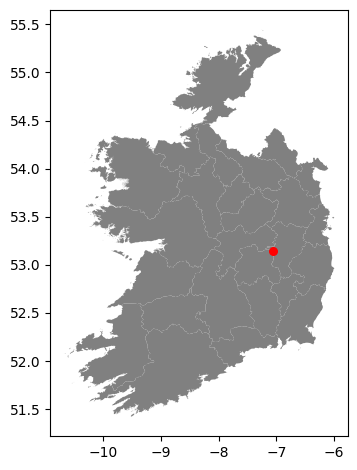

In [135]:
# let's get a visual first

import matplotlib.pyplot as plt
# Create a figure with one subplot
fig, ax = plt.subplots()
counties_4326.plot(ax=ax, facecolor='gray')
# Plot point
cahill_cross.plot(ax=ax, color='red', markersize=30)
plt.tight_layout()

#### Apply and Lambda

It is a very common operation wanting to do a calculation to every row in a DataFrame's column. 
The `apply` function lets you "apply" an operation to every row. Let's look at some basic examples first before going back to our more complex problem.



In [136]:
import pandas as pd

In [137]:
# this is an example to illustrate apply
# do this before attempting task 2 on the actual GeoDataFrame!

# we use the following DataFrame
df_example = pd.DataFrame({'x': [3, 4], 'y': [30, 40]})

# and create a function that multiplies the function's argument
# with itself
def calculate_square(argument):
    return argument * argument

# we now want to apply this function to the whole DataFrame
df_calculated = df_example.apply(calculate_square)

print(df_example)
print(df_calculated)

   x   y
0  3  30
1  4  40
    x     y
0   9   900
1  16  1600


When you look at the example above, you will find that the `calculate_square` function was quite simple. It's only 2 lines and the "work" is just to multiply an argument. Python has a mechanism to create so called anonymous functions that help us save a lot of typing and make our code more efficient. This functionality is called `lambda`.

Let's do the same example again, just with lambda this time:

In [138]:
# same data frame as before
df_example = pd.DataFrame({'x': [3, 4], 'y': [30, 40]})

# instead of all these lines for a simple job we just reduce it to:
df_calculated = df_example.apply(lambda argument: argument*argument)
# so after the key word "lambda" we name the argument we want to work on, then
# insert a colon : and to the right side of the colon we say what we wish
# to do with that argument

# same print out as before
print(df_example)
print(df_calculated)

   x   y
0  3  30
1  4  40
    x     y
0   9   900
1  16  1600


The above was working on the complete data frame. You can also only `apply` to our data series (columns) individually.
The following illustrates how to `apply` to by column or by row:

In [139]:
# we import this to do a bit more math with for our example DataFrame
import numpy as np

In [140]:
# same data frame as before
df_example = pd.DataFrame({'x': [3, 4], 'y': [30, 40]})

df_calculated = df_example.apply(np.sum, axis=0)
print(df_calculated)

x     7
y    70
dtype: int64


We see that by choosing `axis=0` we chose to calculate the sum for each column.

In [141]:
# let's choose a different axis and observe what happens
df_cal = df_example.apply(np.sum, axis=1)
print(df_cal)

0    33
1    44
dtype: int64


We see that by choosing `axis=1` we chose to do the operation by row rather than by column.

Now let's see how we can choose to apply a function like our argument multiplication values from different columns in the same row:

In [142]:
# we are using the same data frame as before
df_example = pd.DataFrame({'x': [3, 4], 'y': [30, 40]})

result = df_example.apply(lambda row: np.subtract(row['y'], row['x']), axis = 1) 

# here we are adding another little variant by creating a new column
# in our original data frame, rather than creating a new data frame
# each time.
df_example['subtraction'] = result

print(df_example)

   x   y  subtraction
0  3  30           27
1  4  40           36


###Task 2
Now that you know how to use `apply` and `lambda`, calculate the distance between every county in our list and Cahill's Cross. You need to use the apply() function, see example below. 
You also need the `geodesic` function from above. Remember that `geodesic` takes a Python `tuple`, not a geo data type!

Add this information as a new column in your counties data frame. The easiest way to call the function on a whole column is to use Python's `lambda` function. See example below for an illustration of apply and lambda.

In [143]:
distances = counties_4326.apply(lambda row: geodesic((row['centroid'].y, row['centroid'].x), cc_tuple), axis=1)
counties_4326['dist to Cahills'] = distances
counties_4326.head()


,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry,centroid,dist to Cahills
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,1.859119e+06,4.860754e+09,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55...",POINT (-7.90796 54.92219),206.08148583254837 km
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,3.897987e+05,2.754926e+09,"POLYGON ((-8.50852 52.74196, -8.50851 52.74209...",POINT (-8.74976 52.49602),134.46359782204863 km
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,2.970485e+05,1.694083e+09,"POLYGON ((-6.49499 53.35338, -6.49486 53.35333...",POINT (-6.81870 53.19024),17.184815396365153 km
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,4.572206e+05,1.857038e+09,"MULTIPOLYGON (((-7.59463 52.09696, -7.59459 52...",POINT (-7.59747 52.17358),113.40074025347768 km
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,3.661986e+05,9.257609e+08,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53...",POINT (-6.28458 53.39189),58.961603006732524 km


### Task 3
Calculate the distance between Cahill's Cross and Limerick using the `distance` function that you used last week. What needs to change?

In [144]:
# your code goes here

The `distance` function works on the Cartesian plane. We need to transform our DataFrames first to a cartesian version.

In [145]:
# convert
addresses_2157 = addresses_4326.to_crs(epsg=2157)

# check
addresses_2157

,address,id,addr,geometry
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (662819.157 710247.815)
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (588006.815 763602.125)


In [146]:
# convert
counties_smll_2157 = counties_smll_4326.to_crs(epsg=2157)

# check
counties_smll_2157.head()

,COUNTY,centroid
0,DONEGAL,POINT (605900.100 908278.176)
1,LIMERICK,POINT (549088.534 638555.486)
2,KILDARE,POINT (678944.257 716183.240)
3,WATERFORD,POINT (627532.836 602495.084)
4,DUBLIN,POINT (714097.238 739341.865)


In [147]:
limerick = counties_smll_2157.loc[counties_smll_2157['COUNTY']=='LIMERICK', 'centroid']
limerick_index = limerick.index[0]
# limerick_pt = limerick[limerick_index]


lx = limerick[limerick_index].x
ly = limerick[limerick_index].y

# now we create the Shapely Point with those values:
# switch them for lat, long correction
limerick_pt = Point(ly,lx)

cahills_cross = addresses_2157.loc[addresses_2157['address'].str.contains("Cahill"), 'geometry']
cc_index = cahills_cross.index[0]
cchx = cahills_cross[cc_index].x
cchy = cahills_cross[cc_index].y

cch_pt = Point(cchy, cchx)

distance = limerick_pt.distance(cch_pt)

# we divide here by 1,000 to get the result in km. 
# Distance will operate in the unit system that the CRS uses, and
# 2157 uses meteres.
print("Distance from Limerick to Cahill's Cross: ", distance/1000)

Distance from Limerick to Cahill's Cross:  134.4412313406064


## Create new GeoDataFrames
Many times you are given a set of coordinates from a text or csv file and want to produce some analytics on the basis of this. In this section we learn how to create a `GeoDataFrame` and assign a CRS to it from just plain tuple locations.

In [148]:
# if you have not already done so, here we need these:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

In [149]:
# first we need an empty GeoDataFrame
new_frame = gpd.GeoDataFrame()
print(new_frame)

Empty GeoDataFrame
Columns: []
Index: []


We have an empty `GeoDataFrame`! A `GeoDataFrame` is basically a pandas `DataFrame` that has one column dedicated for geometries. By default, the geometry-column is named `geometry` and geopandas looks for geometries from this column.

In [150]:
# Create a new column called 'geometry' to the GeoDataFrame
new_frame['geometry'] = None
print(new_frame)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [151]:
# Let's create a polygon with coordinates for Gramegorman campus
gg_coordinates = [(53.356808392865865, -6.286131081956791), (53.35286378368756, -6.277462182609751), (53.35685961915513, -6.277333436579846), (53.3582170933854, -6.28316992326894)]
# Create a Shapely polygon from the coordinate-tuple list
gg_poly = Polygon(gg_coordinates)


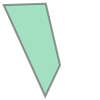

In [152]:
gg_poly

In [153]:
# now we have a polygon, and we have a GeoDataFrame
# let's bring the two together
new_frame.at[0, 'geometry'] = gg_poly
# Let's see what we have now
print(new_frame)

                                            geometry
0  POLYGON ((53.35681 -6.28613, 53.35286 -6.27746...


You *could* already export this into a Shapefile. But typically, you would like to add some attribute information.

In [154]:
# Add a new column and insert data
new_frame.at[0, 'location'] = 'TU Dublin Grangegorman Campus'

# Let's check the data
print(new_frame)

                                            geometry  \
0  POLYGON ((53.35681 -6.28613, 53.35286 -6.27746...   

                        location  
0  TU Dublin Grangegorman Campus  


The last thing is to set a CRS.

In [155]:
# let's check what is currently in it
# we see that there is nothing in it
# the return value is None
print(new_frame.crs)

None


In [156]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
new_frame.crs = CRS.from_epsg(4326).to_wkt()

In [157]:
# check
new_frame.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [158]:
# let's save it
# Determine the output path for the Shapefile
out_fp = "/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 4/Grangegorman.shp"

# Write the data into that Shapefile
new_frame.to_file(out_fp)

# check in your directory

## Nearest Neighbour
One of the most common operations.
Let's start with a simple example:

In [159]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [160]:
# Creating my points
# Origin point
orig = Point(1, 1.67)

# Destination points
dest1 = Point(0, 1.45)
dest2 = Point(2, 2)
dest3 = Point(0, 2.5)

In [161]:
# To be able to find out the closest destination point from the origin, 
# we need to create a MultiPoint object from the destination points.
destinations_mp = MultiPoint([dest1, dest2, dest3])
print(destinations_mp)

MULTIPOINT (0 1.45, 2 2, 0 2.5)


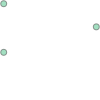

In [162]:
# plot for a visual
destinations_mp

We will use [Shapely's nearest_points](https://shapely.readthedocs.io/en/stable/manual.html?highlight=nearest_points#shapely.ops.nearest_points) for the calculation.

In [163]:
# find out the nearest destination point by using nearest_points() function:
nearest_geoms = nearest_points(orig, destinations_mp)

In [164]:
type(nearest_geoms)

tuple

In [165]:
print(nearest_geoms)

(<POINT (1 1.67)>, <POINT (0 1.45)>)


In [166]:
print(nearest_geoms[0])
print(nearest_geoms[1])

POINT (1 1.67)
POINT (0 1.45)


The two points represent the following:

Point 0: The original point

Point 1: The nearest geometry

Now let's see how we can do the nearest neighbour analysis using GeoPandas.

From your `data_share` folder read the `gis.osm_pois_free_1.shp` file. We will do the analysis with this and our addresses. Remember to make sure the CRS is the same.

In [167]:
# reading the file
places_fp = '/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 4/gis.osm_pois_a_free_1.shp'

places_shp = gpd.read_file(places_fp)

In [168]:
# if you haven't done it yet, or just to get a fresh one, let's load
# the addresses.
addresses_fp = '/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/Week 3/addresses.shp'

addresses_shp = gpd.read_file(addresses_fp)

In [169]:
# nothing will be displayed here, but from the documenation online
# we know that OSM data uses 4326
places_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [170]:
# you should set the CRS if it isn't set automatically by the programme
# this will avoid issues with operators later
places_shp = places_shp.set_crs('epsg:4326')

In [171]:
# let's check the addresses shp file(s) for CRS
addresses_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Both are in the same CRS. Let's adjust our naming convention.

In [172]:
places_4326 = places_shp.copy()
addresses_4326 = addresses_shp.copy()

In [173]:
places_4326.head()

,osm_id,code,fclass,name,geometry
0,4054585,2204,park,Griffeen Valley Park,"POLYGON ((-6.44624 53.34316, -6.44572 53.34352..."
1,4078069,2204,park,Merrion Square,"POLYGON ((-6.25173 53.33980, -6.25172 53.33982..."
2,4421186,2301,restaurant,Bell+Bear Coffee House,"POLYGON ((-6.36930 53.40981, -6.36898 53.41007..."
3,4482136,2302,fast_food,McDonalds,"POLYGON ((-6.39588 53.39272, -6.39575 53.39272..."
4,4482177,2099,public_building,NaN,"POLYGON ((-6.39235 53.39098, -6.39231 53.39101..."


In [174]:
addresses_4326

,address,id,addr,geometry
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (-7.06112 53.13905)
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (-8.18129 53.62210)


Let's start with a simple nearest neighbour for one example before getting the nearest neighbour for all addresses. For this will first have to bring together all geometries. We are going to use [Geopanda's unary_union](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.unary_union.html) operator.

In [175]:
# unary_union = places_3035['geometry'].unary_union
unary_union = places_4326['geometry'].unary_union
print(unary_union)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [176]:
cahills_cross = addresses_4326.loc[addresses_4326['address'].str.contains("Cahill"), 'geometry']
cc_index = cahills_cross.index[0]
cc_pt = cahills_cross[cc_index]
near = nearest_points(cc_pt, unary_union)
print(near)

(<POINT (-7.061 53.139)>, <POINT (-7.062 53.14)>)


In [177]:
# get readable format
near_data = places_4326.loc[places_4326['geometry'] == near[1]]

near_data

,osm_id,code,fclass,name,geometry


## Spatial Join
There are two ways of merging data in GeoPandas:
*  attribute join: A `GeoSeries` or `GeoDataFrame` is merged with a regular `Series` or `DataFrame` based on a common variable.  We use the merge() [link text](https://geopandas.org/mergingdata.html#attribute-joins) method.
*  spatial join: observations from two GeoSeries or two GeoDataFrames are combined based on their spatial relationship to each other. 

Also see: https://geopandas.org/mergingdata.html

Our goal is now to join the attributes of a polygon layer into a point layer where each point would get the attributes of a polygon that contains the point.

There are three possible types of join that can be applied in spatial join that are determined with op -parameter in the `gpd.sjoin()` -function:

*   `intersects`
*   `within`
*   `contains`

Also pay attention to the different options for the type of join via the how parameter; “left”, “right” and “inner”. You can read more about these options in the [geopandas sjoin documentation](https://geopandas.org/mergingdata.html#sjoin-arguments) and pandas [guide for merge, join and concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

Last week you have used `within()` and `contains()`. 
Let's do some revision:

Speeding up Computations

In [178]:
#import shapely.speedups
from shapely import speedups
speedups.enabled

True

In [179]:
# alternatively filter polygons that contain points
counties_shp.crs = CRS.from_epsg(3035).to_wkt()
counties_shp.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [180]:
polygons_contains = gpd.sjoin(counties_4326, addresses_4326, op='contains')
polygons_contains

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,...,AREA,SHAPE_Leng,SHAPE_Area,geometry,centroid,dist to Cahills,index_right,address,id,addr
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,...,1.694083e+09,297048.497383,1.694083e+09,"POLYGON ((-6.49499 53.35338, -6.49486 53.35333...",POINT (-6.81870 53.19024),17.184815396365153 km,0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland"
10,11,190000,ROSCOMMON,Ros Comáin,100027,2ae19629-1447-13a3-e055-000000000001,Ros Comáin,ROSCOMMON,Connacht,576872.92,...,2.547136e+09,430531.886649,2.547136e+09,"POLYGON ((-8.48820 53.92148, -8.48800 53.92141...",POINT (-8.24579 53.72300),102.09538105558312 km,1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland"


Let's create a visual. Maps are easier to read than tables!

In [181]:
import matplotlib.pyplot as plt

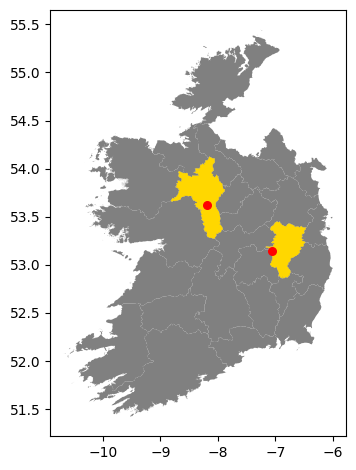

In [182]:
# Create a figure with one subplot
fig, ax = plt.subplots()

# Plot counties
counties_4326.plot(ax=ax, facecolor='gray')

# Plot counties that are in the results of containing the locations
polygons_contains.plot(ax=ax, color='gold', markersize=2)

# Plot locations
addresses_4326.plot(ax=ax, color='red', markersize=30)


plt.tight_layout()

In [183]:
# which point are within
# contains in GeoPandas currently work on a pairwise basis 1-to-1, 
# not 1-to-many. For this purpose, use sjoin.
points_within = gpd.sjoin(addresses_4326, counties_4326, op='within')
points_within

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,address,id,addr,geometry,index_right,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,...,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,centroid,dist to Cahills
0,"Drogheda Street, Cahill's Cross, Monasterevin ...",1001,"2 Drogheda St, Monasterevin, Co. Kildare, Ireland",POINT (-7.06112 53.13905),2,3,80000,KILDARE,Cill Dara,100007,...,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,297048.497383,1.694083e+09,POINT (-6.81870 53.19024),17.184815396365153 km
1,"Hyde Court, Roscommon Rural ED, Roscommon Muni...",1003,"20 Hyde Ct, Roscommon, Ireland",POINT (-8.18129 53.62210),10,11,190000,ROSCOMMON,Ros Comáin,100027,...,Ros Comáin,ROSCOMMON,Connacht,576872.92,772072.39,2.547136e+09,430531.886649,2.547136e+09,POINT (-8.24579 53.72300),102.09538105558312 km


## Spatial Index

An index is used to speed up operations. You would have seen indexes at work in your databases class. But databases are not the only ones using indexes. The idea actually comes from file systems. 
An index is often compared to a bookmark in a book. You don't have to search the whole book front to back in order to find a specific page. There is a separate structure that helps you locate it faster by pointing to where to find it.

### Intersection example
In the following we will learn about intersections using real life data files.

In [184]:
# Filepaths
traffic_points_fp = "/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/data_share/gis.osm_transport_a_free_1.shp"
landuse_areas_fp = "/content/drive/Othercomputers/Laptop/Documents/College/4th-Year/Environmental_Analytics/data_share/gis_osm_landuse_a_free_1.shp"

traffic_points = gpd.read_file(traffic_points_fp)
landuse_areas = gpd.read_file(landuse_areas_fp)

Let's check what's in the GeoDataFrame first.

In [185]:
landuse_areas.head()

,osm_id,code,fclass,name,geometry
0,4054585,7202,park,Griffeen Valley Park,"POLYGON ((-6.44624 53.34316, -6.44572 53.34352..."
1,4078069,7202,park,Merrion Square,"POLYGON ((-6.25173 53.33980, -6.25172 53.33982..."
2,4445464,7209,commercial,Blanchardstown Corporate Park,"POLYGON ((-6.37514 53.41076, -6.37307 53.41320..."
3,4491084,7212,retail,Roselawn Shopping Centre,"POLYGON ((-6.38269 53.38390, -6.38172 53.38412..."
4,4550896,7204,industrial,Blanchardstown Business and Technology Park,"POLYGON ((-6.37414 53.40271, -6.37342 53.40331..."


In [186]:
traffic_points.head()

,osm_id,code,fclass,name,geometry
0,15748499,5622,bus_station,Translink Depot,"POLYGON ((-5.91233 54.59813, -5.91224 54.59829..."
1,16135428,5661,ferry_terminal,Terminal 1,"POLYGON ((-6.13492 53.29613, -6.13453 53.29652..."
2,25727966,5622,bus_station,Zone 14,"POLYGON ((-6.24178 53.42884, -6.24178 53.42890..."
3,26342341,5622,bus_station,Laganside Bus Centre,"POLYGON ((-5.92340 54.60026, -5.92321 54.60028..."
4,28607754,5622,bus_station,Europa Bus Centre,"POLYGON ((-5.93727 54.59496, -5.93688 54.59497..."


In [187]:
# How much data do we have?
print("Number of traffic points:", len(traffic_points))
print("Number of postal code areas:", len(landuse_areas))

Number of traffic points: 107
Number of postal code areas: 116001


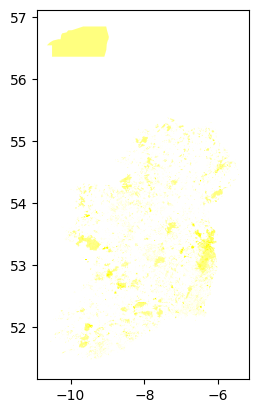

In [236]:
# Let's do some quick exploration of the data sets

%matplotlib inline
ax = landuse_areas.plot(color='yellow', alpha=0.5)
ax = traffic_points.plot(ax=ax, color='red', markersize=20, alpha=0.5)

# The data set is very large, so we will zoom in on a specific area to
# allow for faster rendering. We just want a quick impression of what is there
# Zoom to closer (comment out the following to see the full extent of the data,
# which will take a very long time)
# ax.set_xlim([-6.2302, -6.1333])
# ax.set_ylim([52.7636 ,52.8067])

In [237]:
!pip install rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [238]:
import rtree

# Let's build spatial index for intersection points
traffic_points_sindex = traffic_points.sindex
print(traffic_points)

# Let's see what it is
traffic_points_sindex

        osm_id  code          fclass                     name  \
0     15748499  5622     bus_station          Translink Depot   
1     16135428  5661  ferry_terminal               Terminal 1   
2     25727966  5622     bus_station                  Zone 14   
3     26342341  5622     bus_station     Laganside Bus Centre   
4     28607754  5622     bus_station        Europa Bus Centre   
..         ...   ...             ...                      ...   
102  547455273  5641            taxi              Bridge Lane   
103    7820003  5641            taxi               Abbeycourt   
104    7820004  5641            taxi            Bridge Street   
105  552059838  5622     bus_station                      NaN   
106  554775026  5622     bus_station  Ballymartin Park & Ride   

                                              geometry  
0    POLYGON ((-5.91233 54.59813, -5.91224 54.59829...  
1    POLYGON ((-6.13492 53.29613, -6.13453 53.29652...  
2    POLYGON ((-6.24178 53.42884, -6.24178 53.42

In [239]:
knockmore_area = landuse_areas.loc[landuse_areas['name']=='Knockmore']
knockmore_area 
# this produces 2 areas, either create an intermediate step with
# a multipolygon, or use them individually

,osm_id,code,fclass,name,geometry
3516,45759637,7203,residential,Knockmore,"POLYGON ((-6.17517 52.78452, -6.17254 52.78572..."
13434,95634726,7203,residential,Knockmore,"POLYGON ((-6.39468 53.27800, -6.39461 53.27818..."


<Axes: >

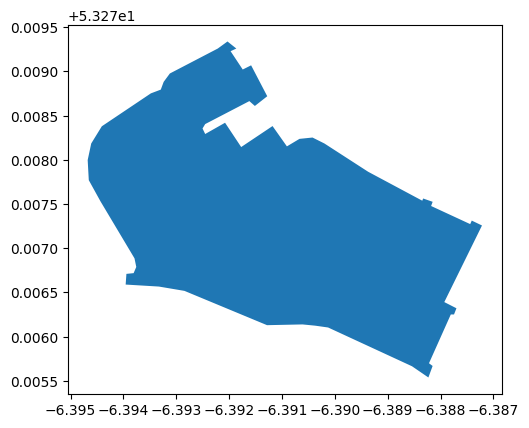

In [240]:
# Select a landuse area representing Knockmore, area 2
knockmore_area = landuse_areas.loc[landuse_areas['osm_id']=='95634726']
knockmore_area.plot()

ValueError: ignored

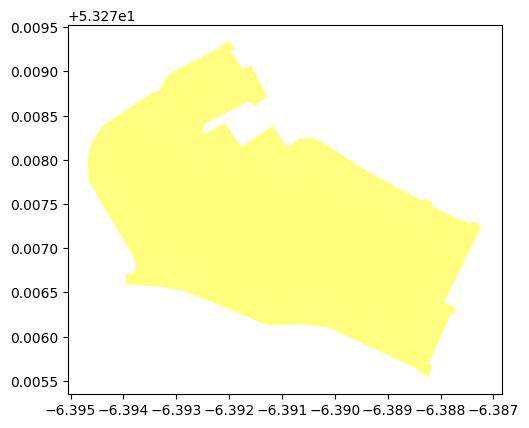

In [241]:
bounds = list(knockmore_area.bounds.values[0])
# print(bounds)
# print(traffic_points_sindex)

# Get the indices of the Points that are likely to be inside the bounding box of the given Polygon
point_candidate_idx = list(traffic_points_sindex.intersection(bounds))
# print(point_candidate_idx)
point_candidates = traffic_points.loc[point_candidate_idx]
# point_candidates.head()
# point_candidates.info()
# point_candidates.describe()



# Let's see what we have now
ax = knockmore_area.plot(color='yellow', alpha=0.5)
ax = point_candidates.plot(ax=ax, color='black', markersize=10)

In [ ]:
# Make the precise Point in Polygon query
final_selection = point_candidates.loc[point_candidates.intersects(knockmore_area['geometry'].values[0])]

# Let's see what we have now
ax = knockmore_area.plot(color='red', alpha=0.5)
ax = final_selection.plot(ax=ax, color='black', markersize=10)

### Let's do some performance comparisons

In [235]:
 
def intersect_using_spatial_index(source_gdf, intersecting_gdf):
    """
    Conduct spatial intersection using spatial index for candidates GeoDataFrame to make queries faster.
    Note, with this function, you can have multiple Polygons in the 'intersecting_gdf' and it will return all the points
    intersect with ANY of those geometries.
    """
    source_sindex = source_gdf.sindex
    possible_matches_index = []

    # 'itertuples()' function is a faster version of 'iterrows()'
    for other in intersecting_gdf.itertuples():
        bounds = other.geometry.bounds
        c = list(source_sindex.intersection(bounds))
        possible_matches_index += c

    # Get unique candidates
    unique_candidate_matches = list(set(possible_matches_index))
    possible_matches = source_gdf.iloc[unique_candidate_matches]

    # Conduct the actual intersect
    result = possible_matches.loc[possible_matches.intersects(intersecting_gdf.unary_union)]
    return result

def normal_intersect(source_gdf, intersecting_gdf):
    """
    Conduct spatial intersection without spatial index.
    Note, with this function, you can have multiple Polygons in the 'intersecting_gdf' and it will return all the points
    intersect with ANY of those geometries.
    """

    matches = []

    # 'itertuples()' function is a faster version of 'iterrows()'
    for other in intersecting_gdf.itertuples():
        c = list(source_gdf.loc[source_gdf.intersects(other.geometry)].index)
        matches += c

    # Get all points that are intersecting with the Polygons
    unique_matches = list(set(matches))
    result = source_gdf.loc[source_gdf.index.isin(unique_matches)]
    return result

In [233]:
# Test the spatial query with spatial index
%timeit intersect_using_spatial_index(source_gdf=traffic_points, intersecting_gdf=knockmore_area)

NameError: ignored

In [234]:
# Test the spatial query without spatial index
%timeit normal_intersect(source_gdf=traffic_points, intersecting_gdf=knockmore_area)
# the indexed should faster

NameError: ignored